# Deep Transformer Model with Pre-Layer Normalization for COVID-19 Growth Prediction

Percobaan berikut yaitu melakukan prediksi kasus positif COVID-19 Di Indonesia menggunakan model Deep Transformer oleh Wu et al. (2020) (https://arxiv.org/abs/2001.08317) dengan menggunakan layer normalisasi yaitu Pre-Layer Normalization.

## Pengaturan percobaan
### Dataset
Data diambil dari API COVID-19 di Indonesia yaitu https://data.covid19.go.id/public/api/update.json sebanyak 750 data dari awal kasus. Data yang diambil berupa fail JSON yang kemudian diambil tanggal update  dan jumlah kasus harian.

Data dibagi menjadi tiga, yaitu 60 hari terakhir digunakan sesuai data uji sedangkankan sisanya di bagi menjadi data latih dan data validasi dengan perbandingan 7:3. Data kemudian dilakukan normalisasi min-max dengan rentang -1 hingga 1.


### Arsitektur

Arsitektur dari Deep Transformer yang digunakan seperti pada gambar berikut:
<p align="center"><img src="https://drive.google.com/uc?export=view&id=1iPS9AtMEcEZ3fWHxCnouJ9JlIEbUcv_7" width="300"/></p>

Berikut perbandingan dari Post-Layer Normalization (a) dan Pre-Layer Normalization (b):
<p align="center"><img src="https://drive.google.com/uc?export=view&id=10zgzQOQTq65VHioGaeB0MfRRfiFbzgB9" width="300"/></p>


### Hyperparameter
Hyperparameter awal di-set sebagai berikut:
* input_step = 7 (Jumlah hari yang dimasukkan ke model untuk memprediksi)
* predict_step = 1 (Jumlah hari yang akan diprediksi)
* d<sub>model</sub> = 64 (Dimensi embedding dari data yang masuk ke model)         
* batch_size = 1000 (Jumlah data yang masuk dalam 1 batch)
* max_epoch = 300 (Banyaknya iterasi pelatihan)
* in_dim = 1 (Dimensi fitur data)
* N_enc = 2 (Jumlah blok encoder)          
* N_dec = 2 (Jumlah blok decoder)
* h_enc = 1 (Jumlah head pada encoder)
* h_dec = 1 (Jumlah head pada decoder)
* ff_hidnum = 50 (Dimensi dari layer Feed Forward)     
* hid_pre = 50 (Dimensi dari layer Pre-Layer)     
* hid_post = 50 (Dimensi dari layer Post-Layer)      
* dropout_pre = 0.2 (Ukuran dropout pada layer Pre-Layer)
* dropout_post = 0.2 (Ukuran dropout pada layer Post-Layer)
* dropout_model = 0.2 (Ukuran dropout dari blok encoder dan decoder)
* norm_first = True (Jenis layer normalisasi yang digunakan, True: Pre-Layer Normalization, False: Post-Layer Normalization)


### Pengujian dan Hasil
<ol type="A">
    <li>Pengujian hyperparameter</li>
    <p>Pengujian ini dilakukan untuk mendapatkan hyperparameter terbaik yang nantinya digunakan pada pengujian lanjutan.
    </p>
    <ol type="1">
        <li>Ukuran D<sub>model</sub></li>
        <table style="display: inline-table;">
            <tr align="center">
                <th rowspan="2">Dmodel</th>
                <th colspan="3">MAPE</th>
            </tr>
            <tr align="center">
                <th>Pre-LN</th>
                <th>Post-LN</th>
                <th>Mean</th>
            </tr>
            <tr align="center">
                <td>32</td>
                <td>20.07</td>
                <td>21.10</td>
                <td>20.585</td>
            </tr>
            <tr align="center">
                <td>64</td>
                <td><b>19.07</b></td>
                <td><b>20.12</b></td>
                <td><b>19.595</b></td>
            </tr>
            <tr align="center">
                <td>128</td>
                <td>20.08</td>
                <td>21.46</td>
                <td>20.27</td>
            </tr>
            <tr align="center">
                <td>256</td>
                <td>19.92</td>
                <td>19.73</td>
                <td>19.825</td>
            </tr>
        </table>
        <br>
        <li>Jumlah blok encoder dan decoder</li>
        <table style="display: inline-table;">
            <tr align="center">
                <th rowspan="2">Encoder</th>
                <th rowspan="2">Decoder</th>
                <th colspan="3">MAPE</th>
            </tr>
            <tr align="center">
                <th>Pre-LN</th>
                <th>Post-LN</th>
                <th>Mean</th>
            </tr>
            <tr align="center">
                <td>1</td>
                <td>1</td>
                <td>20.52</td>
                <td>20.93</td>
                <td>20.725</td>
            </tr>
            <tr align="center">
                <td>2</td>
                <td>2</td>
                <td><b>19.07</b></td>
                <td><b>20.12</b></td>
                <td><b>19.595</b></td>
            </tr>
            <tr align="center">
                <td>4</td>
                <td>4</td>
                <td>21.23</td>
                <td>21.36</td>
                <td>21.295</td>
            </tr>
            <tr align="center">
                <td>2</td>
                <td>4</td>
                <td>20.28</td>
                <td>20.59</td>
                <td>20.435</td>
            </tr>
            <tr align="center">
                <td>4</td>
                <td>2</td>
                <td>21.08</td>
                <td>20.82</td>
                <td>20.95</td>
            </tr>
        </table>
        <br>
        <li>Kombinasi dimendi FFN, Pre-Layer, dan Post-Layer</li>
        <table style="display: inline-table;">
            <tr align="center">
                <th rowspan="2">FFN</th>
                <th rowspan="2">Pre-Layer</th>
                <th rowspan="2">Post-Layer</th>
                <th colspan="3">MAPE</th>
            </tr>
            <tr align="center">
                <th>Pre-LN</th>
                <th>Post-LN</th>
                <th>Mean</th>
            </tr>
            <tr align="center">
                <td>30</td>
                <td>30</td>
                <td>30</td>
                <td>20.04</td>
                <td>20.90</td>
                <td>20.47</td>
            </tr>
            <tr align="center">
                <td>50</td>
                <td>50</td>
                <td>50</td>
                <td>19.07</td>
                <td>20.12</td>
                <td>19.60</td>
            </tr>
            <tr align="center">
                <td>100</td>
                <td>100</td>
                <td>100</td>
                <td>19.87</td>
                <td>21.44</td>
                <td>20.66</td>
            </tr>
            <tr align="center">
                <td>100</td>
                <td>50</td>
                <td>50</td>
                <td>18.81</td>
                <td><b>20.06</b></td>
                <td><b>19.44</b></td>
            </tr>
            <tr align="center">
                <td>50</td>
                <td>100</td>
                <td>50</td>
                <td><b>18.70</b></td>
                <td>20.34</td>
                <td>19.52</td>
            </tr>
            <tr align="center">
                <td>50</td>
                <td>50</td>
                <td>100</td>
                <td>21.71</td>
                <td>21.71</td>
                <td>21.71</td>
            </tr>
        </table>
        <br>
        <li>Ukuran time lag</li>
        <table style="display: inline-table;">
            <tr align="center">
                <th rowspan="2">Time lag</th>
                <th colspan="3">MAPE</th>
            </tr>
            <tr align="center">
                <th>Pre-LN</th>
                <th>Post-LN</th>
                <th>Mean</th>
            </tr>
            <tr align="center">
                <td>4</td>
                <td>19.59</td>
                <td>20.17</td>
                <td>19.88</td>
            </tr>
            <tr align="center">
                <td>7</td>
                <td><b>19.07</b></td>
                <td><b>20.12</b></td>
                <td><b>19.595</b></td>
            </tr>
            <tr align="center">
                <td>14</td>
                <td>24.42</td>
                <td>25.28</td>
                <td>24.85</td>
            </tr>
            <tr align="center">
                <td>30</td>
                <td>24.16</td>
                <td>25.8</td>
                <td>24.98</td>
            </tr>
        </table>
        <br>
        <p>Didapatkan hasil parameter terbaik untuk ukuran Dmodel yaitu 64, blok encoder dan decoder masing-masing berjumlah 2, FFN berdimensi 100, Pre-Layer dan Post-Layer berdimensi 50, dan jumlah time lag yaitu 7 hari.</p>
        <br>
    </ol>
    <li>Pengujian Lanjutan</li>
    <p>Pengujian lanjutan akan menggunakan nilai hyperparameter terbaik pada pengujian sebelumnya dan menggunakan jenis layer normalisasi Pre-LN.</p>
    <ol type="1">
        <li>Hasil pengujian terhadap jumlah prediksi hari ke depan</li>
        <table style="display: inline-table;">
            <tr align="center">
                <th rowspan="2">N-day prediction</th>
                <th colspan="2">MAPE</th>
            </tr>
            <tr align="center">
                <th>Mean</th>
                <th>Standard Deviation</th>
            </tr>
            <tr align="center">
                <td>1</td>
                <td><b>22.298</b></td>
                <td><b>1.363</b></td>
            </tr>
            <tr align="center">
                <td>2</td>
                <td>31.150</td>
                <td>2.901</td>
            </tr>
            <tr align="center">
                <td>4</td>
                <td>37.428</td>
                <td>1.635</td>
            </tr>
            <tr align="center">
                <td>7</td>
                <td>42.350</td>
                <td>2.893</td>
            </tr>
        </table>
        <br>
        <p align="center"><img src="https://drive.google.com/uc?export=view&id=1LCed0ehAxNWrIdzABoiuudS3fOKea3ab" width="900" /></p>
        <br>
        <li>Hasil pengujian terhadap optimizer yang digunakan</li>
        <table style="display: inline-table;">
            <tr align="center">
                <th rowspan="2">Optimizer</th>
                <th colspan="2">MAPE</th>
            </tr>
            <tr align="center">
                <th>Mean</th>
                <th>Standard Deviation</th>
            </tr>
            <tr align="center">
                <td>Adam</td>
                <td>23.415</td>
                <td>1.846</td>
            </tr>
            <tr align="center">
                <td>AdamW</td>
                <td>23.870</td>
                <td>1.825</td>
            </tr>
            <tr align="center">
                <td>Adamax</td>
                <td><b>22.343</b></td>
                <td>1.764</td>
            </tr>
            <tr align="center">
                <td>Adagrad</td>
                <td>26.560</td>
                <td>3.163</td>
            </tr>
            <tr align="center">
                <td>Adadelta</td>
                <td>53.410</td>
                <td>5.812</td>
            </tr>
            <tr align="center">
                <td>SGD</td>
                <td>25.510</td>
                <td><b>1.708</b></td>
            </tr>
            <tr align="center">
                <td>RMSprop</td>
                <td>26.700</td>
                <td>2.501</td>
            </tr>
        </table>
        <br>
        <p align="center"><img src="https://drive.google.com/uc?export=view&id=1AztixfJfbrvaoAgx69lAxuS3Ji-7gZML" width="900" /></p>
        <li>Hasil pengujian terhadap jumlah fitur masukan</li>
        <br>
        <table style="display: inline-table;">
            <tr align="center">
                <th>Feature(s)</th>
                <th>MAPE</th>
            </tr>
            <tr align="center">
                <td>1</td>
                <td><b>18.83</b></td>
            </tr>
            <tr align="center">
                <td>3</td>
                <td>25.24</td>
            </tr>
        </table>
        <br>
        <p align="center"><img src="https://drive.google.com/uc?export=view&id=10UyPMiQXaeUVjrETex00-qz9q_A3c8xx" width="900" /></p>
        <br>
        <li>Hasil pengujian performa terhadap model LSTM dan RNN</li>
        <table style="display: inline-table;">
            <tr align="center">
                <th>Model</th>
                <th>MAPE</th>
            </tr>
            <tr align="center">
                <td>Pre-LN Deep Transformer</td>
                <td><b>18.83</b></td>
            </tr>
            <tr align="center">
                <td>LSTM</td>
                <td>24.33</td>
            </tr>
            <tr align="center">
                <td>RNN</td>
                <td>23.15</td>
            </tr>
        </table>
        <br>
        <p><img src="https://drive.google.com/uc?export=view&id=1laDdtF27ocOFLAMtwEWdHUS99QiiQl8S" width="450" /></p>
    </ol>
</ol>

# Deep Transformer


## Library

In [ ]:
import torch
from torch import nn, einsum
from torch.nn.modules.linear import Linear
import torch.optim as optim
import torch.nn.functional as F
import math
from functools import partial

## Model

Full Attention

In [ ]:
def full_attention(query, key, value, causal=False, dropout=0.0):
    device = key.device
    B_k, h_k, n_k, d_k = key.shape
    B_q, h_q, n_q, d_q = query.shape

    scale = einsum("bhqd,bhkd->bhqk", query, key)/math.sqrt(d_k)

    if causal:
        ones = torch.ones(B_k, h_k, n_q, n_k).to(device)
        mask = torch.tril(ones)
        scale = scale.masked_fill(mask == 0, -1e9)
    atn = F.softmax(scale, dim=-1)
    if dropout is not None:
        atn = F.dropout(atn, p=dropout)   
    out = einsum("bhqk,bhkd->bhqd", atn, value)
    return out

In [ ]:
def to_eachhead(x, head_num, split_num=3):
    B, n, pre_d = x.shape
    new_d = pre_d//split_num
    assert pre_d%split_num == 0, f"have to be multiple of {split_num}"
    assert new_d%head_num == 0, "dim must be divided by head_num"

    tpl = torch.chunk(x, split_num, dim=2)
    out = []
    for t in tpl:
        out.append(t.reshape(B, n, head_num, new_d//head_num).transpose(1,2))
    return out

In [ ]:
def concat_head(x):
    B, h, n, _d = x.shape
    out = x.transpose(1,2).reshape(B, n, _d*h)
    return out

Positional Encoding

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, #dropout: float = 0.1, 
                 max_len: int = 100):
        super().__init__()
        # self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.squeeze(1))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x + self.pe[:x.size(1)]
        # return self.dropout(x)
        return x

Pre-layer

In [ ]:
class PreLayer(nn.Module):
    def __init__(self, hid, d_model, drop_out=0.0, in_dim=1):
        super().__init__()
        self.linear = nn.Linear(in_dim, d_model)

    def forward(self, x):
        out = self.linear(x)
        return out

Post-layer

In [ ]:
class PostLayer(nn.Module):
    def __init__(self, dim, vocab_num, hid_dim, dropout_ratio):
        super().__init__()
        self.linear = nn.Linear(dim, vocab_num)
    def forward(self,x):
        out = self.linear(x)
        return out

Multi-head Attention

1) Multi-head Self Attention

In [ ]:
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, dim, head_num):
        super().__init__()
        self.to_qvk = nn.Linear(dim, dim*3)
        self.make_head = partial(to_eachhead, head_num=head_num, split_num=3)
        self.mhsa = full_attention
    
    def forward(self, x):
        qvk = self.to_qvk(x)
        q, v, k = self.make_head(qvk)
        out = self.mhsa(q, k, v)
        out = concat_head(out)
        return out

2) Multi-head Causal Attention

In [ ]:
class MultiHeadCausalAttention(nn.Module):
    def __init__(self, dim, head_num):
        super().__init__()
        self.to_qvk = nn.Linear(dim, dim*3)
        self.make_head = partial(to_eachhead, head_num=head_num, split_num=3)
        self.mhca = partial(full_attention, causal=True)

    def forward(self, x):
        qvk = self.to_qvk(x)
        q, v, k = self.make_head(qvk)
        out = self.mhca(q, k, v)
        out = concat_head(out)
        return out

3) Multi-head Source Attention

In [ ]:
class MultiHeadSourceAttention(nn.Module):
    def __init__(self, dim, head_num):
        super().__init__()
        self.to_kv = nn.Linear(dim, dim*2)
        self.to_q = nn.Linear(dim, dim)
        self.make_head_kv = partial(to_eachhead, head_num=head_num, split_num=2)
        self.make_head_q = partial(to_eachhead, head_num=head_num, split_num=1)
        self.mhsa = full_attention

    def forward(self, x, memory):
        mem = self.to_kv(memory)
        x = self.to_q(x)
        k, v = self.make_head_kv(mem)
        q = self.make_head_q(x)[0]
        out = self.mhsa(q, k, v)
        out = concat_head(out)
        return out

Feed Fordward

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, dim, hid_dim):
        super().__init__()
        self.linear1 = nn.Linear(dim, hid_dim, bias=True)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hid_dim, dim, bias=True)
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

Encoder

In [ ]:
class Encoder(nn.Module):
    def __init__(self, depth, dim, head_num, ff_hidnum=2048, dropout_ratio=0.2, norm_first=False):
        super().__init__()
        self.layers = nn.ModuleList([EncoderLayer(dim, head_num, ff_hidnum, dropout_ratio, norm_first) for i in range(depth)])
    
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, dim, head_num, ff_hidnum, dropout_ratio, norm_first=False):
        super().__init__()
        self.dor = dropout_ratio
        self.mhsa = MultiHeadSelfAttention(dim, head_num)
        self.ln1 = nn.LayerNorm(dim)
        self.ff = FeedForward(dim, ff_hidnum)
        self.ln2 = nn.LayerNorm(dim)
        self.norm_first = norm_first

    def forward(self, x):
        res = torch.clone(x)

        if self.norm_first:
          out = self.ln1(x)
          out = self.mhsa(out)
          out = F.dropout(out, p=self.dor) + res

          res = torch.clone(out)
          out = self.ln2(out)
          out = self.ff(out)
          out = F.dropout(out, p=self.dor) + res
        else:
          out = self.mhsa(x)
          out = F.dropout(out, p=self.dor) + res
          out = self.ln1(out)

          res = torch.clone(out)
          out = self.ff(out)
          out = F.dropout(out, p=self.dor) + res
          out = self.ln2(out)

        return out

Decoder

In [ ]:
class Decoder(nn.Module):
    def __init__(self, depth, dim, head_num, ff_hidnum, dropout_ratio=0.2, norm_first=False):
        super().__init__()
        self.layers = nn.ModuleList([DecoderLayer(dim, head_num, ff_hidnum, dropout_ratio, norm_first) for i in range(depth)])
    
    def forward(self, x, memory):
        for layer in self.layers:
            x = layer(x, memory)
        return x

In [ ]:
class DecoderLayer(nn.Module):
    def __init__(self, dim, head_num, ff_hidnum, dropout_ratio, norm_first=False):
        super().__init__()
        self.dor = dropout_ratio
        self.mhca = MultiHeadCausalAttention(dim, head_num)
        self.ln1 = nn.LayerNorm(dim)
        self.mhsa = MultiHeadSourceAttention(dim, head_num)
        self.ln2 = nn.LayerNorm(dim)
        self.ff = FeedForward(dim, ff_hidnum)
        self.ln3 = nn.LayerNorm(dim)
        self.norm_first = norm_first

    def forward(self, x, memory):
        res = torch.clone(x)

        if self.norm_first:
          out = self.ln1(x)
          out = self.mhca(out)
          out = F.dropout(out, p=self.dor) + res
          
          res = torch.clone(out)
          out = self.ln2(out)
          out = self.mhsa(out, memory)
          out = F.dropout(out, p=self.dor) + res

          res = torch.clone(out)
          out = self.ln3(out)
          out = self.ff(out)
          out = F.dropout(out, p=self.dor) + res

        else:
          out = self.mhca(x)
          out = F.dropout(out, p=self.dor) + res
          out = self.ln1(out)

          res = torch.clone(out)
          out = self.mhsa(out, memory)
          out = F.dropout(out, p=self.dor) + res
          out = self.ln2(out)

          res = torch.clone(out)
          out = self.ff(out)
          out = F.dropout(out, p=self.dor) + res
          out = self.ln3(out)

        return out

Transformer

In [ ]:
class Transformer(nn.Module):
    def __init__(self, device, d_model, in_dim, N_enc, N_dec, h_enc, h_dec, ff_hidnum, hid_pre, hid_post, dropout_pre, dropout_post, dropout_model, norm_first=False):
        super().__init__()
        self.device = device
        self.x_pre = PreLayer(hid_pre, d_model, dropout_pre, in_dim)
        self.y_pre = PreLayer(hid_pre, d_model, dropout_pre, in_dim)
        self.pos = PositionalEncoding(d_model)
        self.enc = Encoder(N_enc,d_model, h_enc, ff_hidnum, dropout_model, norm_first)
        self.dec = Decoder(N_dec,d_model, h_dec, ff_hidnum, dropout_model, norm_first)
        self.post = PostLayer(d_model, 1, hid_post, dropout_post)

    def forward(self, x, y):
        x_emb = self.x_pre(x)
        y_emb = self.y_pre(y)
        x_emb_pos = self.pos(x_emb)
        y_emb_pos = self.pos(y_emb)
        memory = self.enc(x_emb_pos)
        out = self.dec(y_emb_pos, memory)
        out = self.post(out)
        out = out.squeeze(-1)
        return out

    def generate(self, x, forcast_step, y_start):
        device = x.device
        x = x.to(device)
        B, N, D = x.shape
        x = self.x_pre(x) 
        x = self.pos(x)
        z = self.enc(x) 
        y = y_start
        for i in range(forcast_step):
            y_pred = self.y_pre(y)
            y_pred = self.pos(y_pred)
            y_pred = self.dec(y_pred, z)
            y_pred = self.post(y_pred)
            y = torch.cat([y, y_pred[:,[-1],:]], dim=1)
        y_pred = y_pred.squeeze(-1)
        return y_pred

## Dataset

In [ ]:
class CovidDataset(torch.utils.data.Dataset):
    def __init__(self, data, input_step, predict_step):
        super().__init__()
        self.data = data
        self.predict_step = predict_step
        self.input_step = input_step
        self.start_max = self.data.shape[0] - (self.predict_step + self.input_step) + 1
        self.datalen = self.start_max

    def __len__(self):
        return self.datalen

    def __getitem__(self, idx):
        start_idx = idx % self.start_max
        predict_idx = start_idx + self.input_step
        end_idx = predict_idx + self.predict_step

        x = self.data[start_idx:predict_idx, :]
        y = self.data[predict_idx-1:end_idx-1, :]
        tgt = self.data[predict_idx:end_idx, :]

        x = torch.from_numpy(x)
        y = torch.from_numpy(y)
        tgt = torch.from_numpy(tgt)

        return x, y, tgt

In [ ]:
# data_path = 'https://data.covid19.go.id/public/api/update.json'
# data_path = 'update_22-3-2022.json'
import requests
import json
import pandas as pd

def load_data(data_path, from_api=True, dataset_len=None, test_size=30):
    data = requests.get(data_path).json() if from_api else pd.read_json(data_path)

    df = pd.DataFrame(data['update']['harian'])[['key','jumlah_positif']]
    df.key = pd.to_datetime(df.key, unit='ms')

    for i, row in enumerate(df.jumlah_positif):
        df.loc[i,['jumlah_positif']] = row.get('value')

    df = df.set_index('key')
    data_len = df.shape[0]
    numpy_use = df.to_numpy() if dataset_len == None else df[:dataset_len].to_numpy()
    original_data = numpy_use

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1)) 
    numpy_use = scaler.fit_transform(numpy_use)
    
    #train:val:test = 7:3:(default=30 hari terakhir)  
    train_val, test_only = numpy_use[:numpy_use.size - test_size], numpy_use[numpy_use.size - test_size:]
    train_num = data_len//10 * 7
    train_data = train_val[:train_num].astype("float32")
    val_data = train_val[train_num:].astype("float32")
    test_data = test_only.astype("float32")

    return train_data, val_data, test_data, scaler, original_data

In [ ]:
def make_dataloader(train_data, val_data, test_data, input_step, predict_step, batch_size, shuffle_train=True, shuffle_val=False):
    train_set = CovidDataset(train_data, input_step, predict_step)
    val_set = CovidDataset(val_data, input_step, predict_step)
    test_set = CovidDataset(test_data, input_step, predict_step)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size, shuffle=shuffle_train)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=shuffle_val)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

## Training

Training Utils

In [ ]:
def lr_func(step, d_model):
    warmup_steps = 5000
    step_term = min(step**0.5, step*warmup_steps**(-1.5))
    return d_model**0.5 * step_term

In [ ]:
import random

def fix_seed(seed):
    # random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

In [ ]:
## Calculate MSE eval
def check_data(device, test_loader, net, criterion):
    net.eval()
    loss_log = []
    for iter, (x, y, tgt) in enumerate(test_loader):
        x, y, tgt = x.to(device), y.to(device), tgt.to(device)
        tgt = tgt[:,:,0]
        
        out = net(x, y)

        loss = criterion(out, tgt)
        loss_log.append(loss.item())
    
    return sum(loss_log)/len(loss_log)# MSE

In [ ]:
import torch
import numpy as np
import os

In [ ]:
torch.set_printoptions(precision=5, sci_mode=False)
np.set_printoptions(precision=5, suppress=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# fix_seed(SEED)

Hyper-parameter

In [ ]:
input_step = 7      
predict_step = 1    
d_model = 64         
batch_size = 1000
max_epoch = 300
in_dim = 1
N_enc = 2           
N_dec = 2            
h_enc = 1
h_dec = 1
ff_hidnum = 50     
hid_pre = 50      
hid_post = 50       
dropout_pre = 0.2
dropout_post = 0.2
dropout_model = 0.2
save_each = 10
norm_first = False # default = False (Post-LN)
# dbg = args.debug
model_path = '/content/model/'
test_result_path = '/content/test_result_path/'

In [ ]:
dir_list = ["/content/model/","/content/test_result_path/"]

for dir in dir_list:
  if os.path.isdir(dir) != True:
    os.mkdir(dir)

Load Data

In [ ]:
train, val, test, scaler, original = load_data('https://data.covid19.go.id/public/api/update.json', 
                                               dataset_len=750, test_size=60)
# train, val, test, scaler, original = load_data('update 12-05-2022.json', from_api=False, 
#                                                          dataset_len=750, test_size=60)#input_step+predict_step+60)

In [ ]:
train.shape, val.shape, test.shape

((623, 1), (67, 1), (60, 1))

In [ ]:
train.size + val.size + test.size

750

In [ ]:
train_loader, val_loader, test_loader = make_dataloader(train, val, test, input_step, predict_step, batch_size, shuffle_train=True, shuffle_val=True)

Load Model dan Optimizer

In [ ]:
net = Transformer(device, d_model, in_dim, N_enc, N_dec, h_enc, h_dec, ff_hidnum, hid_pre, hid_post, dropout_pre, dropout_post, dropout_model, norm_first)
net = net.to(device)

optimizer = optim.Adam(net.parameters(), lr=1.0, betas=(0.9,0.98))
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=partial(lr_func, d_model = d_model))# from 論文

Training

In [ ]:
import matplotlib.pyplot as plt
import scipy

train_loss_log = []
val_loss_log = []

best_train_loss = np.inf
best_val_loss = np.inf
best_both_loss = (np.inf, np.inf)
best_train_epoch = 0
best_val_epoch = 0
best_both_epoch = 0

criterion = nn.MSELoss()
max_iteration = 0
for epoch in range(max_epoch):
  tgt_log_train = np.zeros((1,predict_step))
  pred_log_train = np.zeros((1,predict_step))

  for iter, (x, y, tgt) in enumerate(train_loader):
    x, y, tgt = x.to(device), y.to(device), tgt.to(device)
    tgt = tgt[:,:,0]
    net.train()
            
    out = net(x, y)
    loss = criterion(out, tgt)
            
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_loss_log.append(loss.item())
            
    print("epoch : {}, itr :{}, MSE loss : {}, RMSE loss : {}".format(epoch, iter, loss.item(), torch.sqrt(loss).item()))
            
    out_npy = out.to('cpu').detach().numpy().copy()
    tgt_npy = tgt.to('cpu').detach().numpy().copy()

    pred_log_train = np.concatenate([pred_log_train, out_npy], axis=0)
    tgt_log_train = np.concatenate([tgt_log_train, tgt_npy], axis=0)
        
  if epoch == 0:
    max_iteration = iter + 1
        
  val_loss = check_data(device, val_loader, net, criterion)
  val_loss_log.append(val_loss)# MSE

  # print("*************validation******************")
  print("val_loss : {}, rmse : {}\n".format(val_loss, math.sqrt(val_loss)))
  
  # save low train loss model
  if loss < best_train_loss:
    best_train_loss = loss
    best_train_epoch = epoch
    torch.save(net.state_dict(), os.path.join(model_path, "best_train_loss_model.model"))

  # save low val loss model
  if val_loss < best_val_loss:
    best_val_loss = val_loss
    best_val_epoch = epoch
    torch.save(net.state_dict(), os.path.join(model_path, "best_val_loss_model.model"))
    
  # save both loss model
  if loss < best_train_loss and val_loss < best_val_loss:
    best_both_loss = (loss, val_loss)
    best_both_epoch = epoch
    torch.save(net.state_dict(), os.path.join(model_path, "best_both_loss_model.model"))

  # save model
  if epoch % save_each == 0 or epoch == max_epoch - 1:
    torch.save(net.state_dict(), os.path.join(model_path, '{}_epoch.model'.format(epoch)))

epoch : 0, itr :0, MSE loss : 2.5237255096435547, RMSE loss : 1.5886237621307373
val_loss : 3.2903006076812744, rmse : 1.8139185780186702

epoch : 1, itr :0, MSE loss : 2.5535624027252197, RMSE loss : 1.5979869365692139
val_loss : 3.25427508354187, rmse : 1.8039609429092056

epoch : 2, itr :0, MSE loss : 2.445919990539551, RMSE loss : 1.5639437437057495
val_loss : 2.9793102741241455, rmse : 1.726067864866311

epoch : 3, itr :0, MSE loss : 2.2746801376342773, RMSE loss : 1.5082042217254639
val_loss : 2.918740749359131, rmse : 1.7084322489812498

epoch : 4, itr :0, MSE loss : 2.0802817344665527, RMSE loss : 1.4423182010650635
val_loss : 2.32682204246521, rmse : 1.525392422449125

epoch : 5, itr :0, MSE loss : 1.906256914138794, RMSE loss : 1.380672574043274
val_loss : 2.3022189140319824, rmse : 1.517306466746907

epoch : 6, itr :0, MSE loss : 1.6192739009857178, RMSE loss : 1.2725069522857666
val_loss : 1.674582600593567, rmse : 1.2940566450482633

epoch : 7, itr :0, MSE loss : 1.2914993

Plot

In [ ]:
train_loss_np = np.array(train_loss_log)
val_loss_np = np.array(val_loss_log)

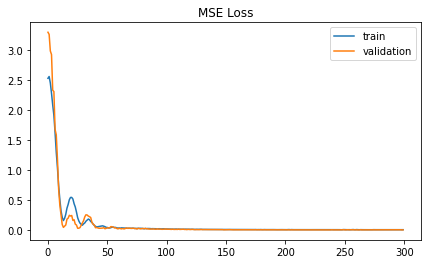

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(train_loss_np, label="train")
ax.plot(val_loss_np, label="validation")
plt.title("MSE Loss")
plt.legend()
plt.show()

In [ ]:
best_train_epoch, best_val_epoch

(247, 284)

In [ ]:
min_plot = best_val_epoch-50 if best_val_epoch >= 50 else 0
max_plot = best_val_epoch+50 

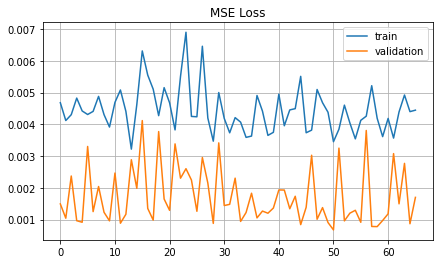

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(train_loss_np[min_plot:max_plot], label="train")
ax.plot(val_loss_np[min_plot:max_plot], label = "validation")
plt.title("MSE Loss")
plt.grid(which='both')
plt.legend()
plt.show()

## Testing

Load Data

In [ ]:
def make_dataloader(data, input_step, predict_step, batch_size=1):
    dataset = CovidDataset(data, input_step, predict_step)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return dataset, dataloader

In [ ]:
torch.set_printoptions(precision=5, sci_mode=False)
np.set_printoptions(precision=5, suppress=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
test_set, test_loader = make_dataloader(test, input_step, predict_step, batch_size=600)
all_data = test_set.data[:,0]

In [ ]:
test.size

60

Load Model & State

In [ ]:
epoch_num = best_val_epoch
print(epoch_num)
par_path = os.path.join(model_path, "best_val_loss_model.model")

284


In [ ]:
net = Transformer(device, d_model, in_dim, N_enc, N_dec, h_enc, h_dec, ff_hidnum, hid_pre, hid_post, dropout_pre, dropout_post, dropout_model, norm_first)
    
# load parameter
if device == torch.device("cpu"):
  net.load_state_dict(torch.load(par_path, map_location=torch.device("cpu")))
else:
  net.load_state_dict(torch.load(par_path,map_location=torch.device(device)))

Testing

In [ ]:
net.eval()

pred_list = np.zeros((1, predict_step))
for iter, (x, y, tgt) in enumerate(test_loader):
    tgt = tgt[:,:,0]

    out = net.generate(x, tgt.shape[1], y[:,[0],:])
    out = out.to('cpu').detach().numpy().copy()

    pred_list = np.concatenate([pred_list, out], axis=0)

pred_list = pred_list[1:]
D = []
for i in range(predict_step):
    tmp = np.concatenate([all_data[:(input_step+i)], pred_list[:,i], all_data[(all_data.shape[0]-(predict_step - (i + 1))):]])
    D.append(tmp)

for step_num, tmp_data in enumerate(D):
    n = step_num + 1

    np.save(os.path.join(test_result_path, "pred{}_epoch{}".format(n, epoch_num)), pred_list[:,[step_num]])
    np.save(os.path.join(test_result_path, "tgt{}_epoch{}".format(n, epoch_num)), tgt[:,[step_num]])

Plot

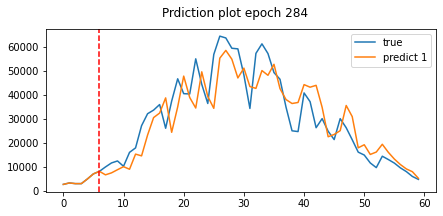

In [ ]:
all_data_denorm = np.round(scaler.inverse_transform(all_data.reshape(all_data.size,1)))

fig, (ax1) = plt.subplots(1, 1,figsize=(7,3), sharex=True, sharey=True)
fig.suptitle(f'Prdiction plot epoch {epoch_num}')

for ind, d in enumerate(D):
  d_denorm = np.round(scaler.inverse_transform(d.reshape(d.size,1)))

  exec("ax"+str(ind+1)+".plot(all_data_denorm, label='true')")
  exec("ax"+str(ind+1)+".plot(d_denorm, label=f'predict {ind+1}')")
  exec("ax"+str(ind+1)+".axvline(input_step+ind-1,ls='dashed',c='r')")
  # exec("ax"+str(ind+1)+".set_title(f'predict {ind+1}')")
  exec("ax"+str(ind+1)+".legend()")

## Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
for ind, d in enumerate(D):
    d_denorm = np.round(scaler.inverse_transform(d.reshape(d.size,1)))
    print(f"Error Pred {ind+1}")
    print(f"MAPE\t : {mean_absolute_percentage_error(all_data_denorm[input_step+ind:], d_denorm[input_step+ind:])*100}")
    print(f"MAE\t : {mean_absolute_error(all_data_denorm[input_step+ind:], d_denorm[input_step+ind:])}")
    print(f"MSE\t : {mean_squared_error(all_data_denorm[input_step+ind:], d_denorm[input_step+ind:])}")
    print(f"RMSE\t : {np.sqrt(mean_squared_error(all_data_denorm[input_step+ind:], d_denorm[input_step+ind:]))}\n")

Error Pred 1
MAPE	 : 23.584946900129218
MAE	 : 6620.245283018868
MSE	 : 69779498.13207547
RMSE	 : 8353.41236454154



# LSTM

## Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

## Model

In [ ]:
class LSTM(nn.Module):

    def __init__(self, input_size, num_classes, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

## Dataset

In [ ]:
# data_path = 'https://data.covid19.go.id/public/api/update.json'
# data_path = 'update_22-3-2022.json'
import requests
import json
import pandas as pd

def load_data(data_path, from_api=True, dataset_len=None):
    data = requests.get(data_path).json() if from_api else pd.read_json(data_path)

    df = pd.DataFrame(data['update']['harian'])[['key','jumlah_positif']]
    df.key = pd.to_datetime(df.key, unit='ms')

    for i, row in enumerate(df.jumlah_positif):
        df.loc[i,['jumlah_positif']] = row.get('value')

    df = df.set_index('key')
    data_len = df.shape[0]
    numpy_use = df.to_numpy() if dataset_len == None else df[:dataset_len].to_numpy()

    return numpy_use

In [ ]:
# data = load_data('update 12-05-2022.json', from_api=False, dataset_len=750)
data = load_data('https://data.covid19.go.id/public/api/update.json', dataset_len=750)

In [ ]:
data.size

750

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler(feature_range=(-1, 1))
training_data = sc.fit_transform(data)

seq_length = 7
x, y = sliding_windows(training_data, seq_length)

test_size = 60
train_size = int(len(y) - test_size)

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Training

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 16
num_layers = 1

num_classes = 1

lstm = LSTM(input_size, num_classes, hidden_size, num_layers)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate, betas=(0.9,0.98))

# hidden = None

# Train the model
for epoch in range(num_epochs):
    # print(trainX.shape)
    # outputs, hidden = rnn(trainX, hidden)
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # print(outputs.shape, trainY.shape)
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.94147
Epoch: 100, loss: 0.00467
Epoch: 200, loss: 0.00414
Epoch: 300, loss: 0.00333
Epoch: 400, loss: 0.00290
Epoch: 500, loss: 0.00271
Epoch: 600, loss: 0.00186
Epoch: 700, loss: 0.00136
Epoch: 800, loss: 0.00117
Epoch: 900, loss: 0.00098
Epoch: 1000, loss: 0.00076
Epoch: 1100, loss: 0.00077
Epoch: 1200, loss: 0.00064
Epoch: 1300, loss: 0.00065
Epoch: 1400, loss: 0.00062
Epoch: 1500, loss: 0.00052
Epoch: 1600, loss: 0.00050
Epoch: 1700, loss: 0.00051
Epoch: 1800, loss: 0.00050
Epoch: 1900, loss: 0.00049


## Testing



In [ ]:
testX.shape

torch.Size([60, 7, 1])

In [ ]:
lstm.eval()
train_predict = lstm(testX)

data_predict = train_predict.data.numpy()
dataY_plot = testY.data.numpy()

data_predict = np.round(sc.inverse_transform(data_predict))
np.savetxt('data_predict.csv', data_predict, delimiter=',')

dataY_plot = np.round(sc.inverse_transform(dataY_plot))
np.savetxt('dataY_plot.csv', dataY_plot, delimiter=',')

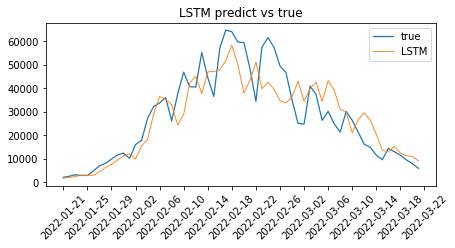

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(7,3))
ax.plot(dataY_plot, label="true", linewidth=1.25)
ax.plot(data_predict, label="LSTM", linewidth=0.9)
plt.xticks(np.arange(0,61,4),[d.strftime('%Y-%m-%d') for d in pd.date_range('2022-01-21', periods=16, freq='4D')], rotation=45)
plt.title("LSTM predict vs true")
plt.legend()
plt.show()

## Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
print(f"Error Pred")
print(f"MAPE\t : {mean_absolute_percentage_error(data_predict, dataY_plot)*100}")
print(f"MAE\t : {mean_absolute_error(data_predict, dataY_plot)}")
print(f"MSE\t : {mean_squared_error(data_predict, dataY_plot)}")
print(f"RMSE\t : {np.sqrt(mean_squared_error(data_predict, dataY_plot))}\n")

Error Pred
MAPE	 : 26.687997579574585
MAE	 : 6988.66650390625
MSE	 : 85940536.0
RMSE	 : 9270.412109375



# RNN

## Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

## Model

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_dim, output_dim,  hidden_dim, layer_dim):
        super(RNN, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # Building your RNN
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, input_dim)
        # batch_dim = number of samples per batch
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, nonlinearity='relu')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        # (layer_dim, batch_size, hidden_dim)
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach the hidden state to prevent exploding/vanishing gradients
        # This is part of truncated backpropagation through time (BPTT)
        out, hn = self.rnn(x, h0.detach())

        # Index hidden state of last time step
        # out.size() --> 100, 28, 10
        # out[:, -1, :] --> 100, 10 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

## Dataset

In [ ]:
# data_path = 'https://data.covid19.go.id/public/api/update.json'
# data_path = 'update_22-3-2022.json'
import requests
import json
import pandas as pd

def load_data(data_path, from_api=True, dataset_len=None):
    data = requests.get(data_path).json() if from_api else pd.read_json(data_path)

    df = pd.DataFrame(data['update']['harian'])[['key','jumlah_positif']]
    df.key = pd.to_datetime(df.key, unit='ms')

    for i, row in enumerate(df.jumlah_positif):
        df.loc[i,['jumlah_positif']] = row.get('value')

    df = df.set_index('key')
    data_len = df.shape[0]
    numpy_use = df.to_numpy() if dataset_len == None else df[:dataset_len].to_numpy()

    return numpy_use

In [ ]:
# data = load_data('update 12-05-2022.json', from_api=False, dataset_len=750)
data = load_data('https://data.covid19.go.id/public/api/update.json', dataset_len=750)

In [ ]:
data.size

750

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler(feature_range=(-1, 1))
training_data = sc.fit_transform(data)

seq_length = 7
x, y = sliding_windows(training_data, seq_length)

test_size = 60
train_size = int(len(y) - test_size)

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Training

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 16
num_layers = 1

num_classes = 1

rnn = RNN(input_size, num_classes, hidden_size, num_layers)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=learning_rate, betas=(0.9,0.98))

# hidden = None

# Train the model
for epoch in range(num_epochs):
    # print(trainX.shape)
    # outputs, hidden = rnn(trainX, hidden)
    outputs = rnn(trainX)
    optimizer.zero_grad()
    
    # print(outputs.shape, trainY.shape)
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.73357
Epoch: 100, loss: 0.00321
Epoch: 200, loss: 0.00261
Epoch: 300, loss: 0.00238
Epoch: 400, loss: 0.00220
Epoch: 500, loss: 0.00157
Epoch: 600, loss: 0.00152
Epoch: 700, loss: 0.00139
Epoch: 800, loss: 0.00110
Epoch: 900, loss: 0.00107
Epoch: 1000, loss: 0.00105
Epoch: 1100, loss: 0.00104
Epoch: 1200, loss: 0.00095
Epoch: 1300, loss: 0.00093
Epoch: 1400, loss: 0.00089
Epoch: 1500, loss: 0.00092
Epoch: 1600, loss: 0.00122
Epoch: 1700, loss: 0.00088
Epoch: 1800, loss: 0.00085
Epoch: 1900, loss: 0.00085


## Testing



In [ ]:
testX.shape

torch.Size([60, 7, 1])

In [ ]:
rnn.eval()
train_predict = rnn(testX)

data_predict = train_predict.data.numpy()
dataY_plot = testY.data.numpy()

data_predict = np.round(sc.inverse_transform(data_predict))
np.savetxt('data_predict.csv', data_predict, delimiter=',')

dataY_plot = np.round(sc.inverse_transform(dataY_plot))
np.savetxt('dataY_plot.csv', dataY_plot, delimiter=',')

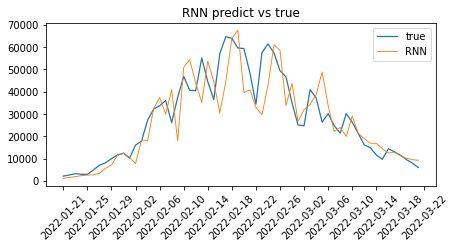

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(7,3))
ax.plot(dataY_plot, label="true", linewidth=1.25)
ax.plot(data_predict, label="RNN", linewidth=0.9)
plt.xticks(np.arange(0,61,4),[d.strftime('%Y-%m-%d') for d in pd.date_range('2022-01-21', periods=16, freq='4D')], rotation=45)
plt.title("RNN predict vs true")
plt.legend()
plt.show()

## Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
print(f"Error Pred")
print(f"MAPE\t : {mean_absolute_percentage_error(data_predict, dataY_plot)*100}")
print(f"MAE\t : {mean_absolute_error(data_predict, dataY_plot)}")
print(f"MSE\t : {mean_squared_error(data_predict, dataY_plot)}")
print(f"RMSE\t : {np.sqrt(mean_squared_error(data_predict, dataY_plot))}\n")

Error Pred
MAPE	 : 30.334004759788513
MAE	 : 6421.85009765625
MSE	 : 91986568.0
RMSE	 : 9590.962890625

